In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from os.path import join as p_join
import sys
from typing import List, Tuple, Dict, Set, Any, Optional, Callable
from pathlib import Path
sys.path.insert(0, str(Path(os.getcwd()).parent))
import requests
from tqdm.notebook import tqdm

try:
    from fabulous import color as fb_color
    color_print = lambda x, color='green': print(getattr(fb_color, color)(x)) if 'fb_color' in globals() else print(x)
except Exception as e:
    color_print = lambda x, color='green': print(x)

from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from src.parse_utils import get_events_list, get_events_info, get_fighters_info, get_one_fight_stats
from src.processing import eventslist2df

In [4]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

---

In [5]:
fights_list, status_ok = get_events_list()
print(status_ok)
print(len(fights_list))
fights_list[:3]

True
617


[{'event_url': 'http://www.ufcstats.com/event-details/4f853e98886283cf',
  'event_name': 'UFC 278: Usman vs. Edwards',
  'date': 'August 20, 2022',
  'location': 'Salt Lake City, Utah, USA'},
 {'event_url': 'http://www.ufcstats.com/event-details/a23e63184c65f5b8',
  'event_name': 'UFC Fight Night: Vera vs. Cruz',
  'date': 'August 13, 2022',
  'location': 'San Diego, California, USA'},
 {'event_url': 'http://www.ufcstats.com/event-details/8f6a18831a120817',
  'event_name': 'UFC Fight Night: Santos vs. Hill',
  'date': 'August 06, 2022',
  'location': 'Las Vegas, Nevada, USA'}]

In [6]:
fights_df = eventslist2df(fights_list)
fights_df

,event_url,event_name,date,location
0,http://www.ufcstats.com/event-details/4f853e98...,UFC 278: Usman vs. Edwards,"August 20, 2022","Salt Lake City, Utah, USA"
1,http://www.ufcstats.com/event-details/a23e6318...,UFC Fight Night: Vera vs. Cruz,"August 13, 2022","San Diego, California, USA"
2,http://www.ufcstats.com/event-details/8f6a1883...,UFC Fight Night: Santos vs. Hill,"August 06, 2022","Las Vegas, Nevada, USA"
3,http://www.ufcstats.com/event-details/b0a61247...,UFC 277: Pena vs. Nunes 2,"July 30, 2022","Dallas, Texas, USA"
4,http://www.ufcstats.com/event-details/319c15b8...,UFC Fight Night: Blaydes vs. Aspinall,"July 23, 2022","London, England, United Kingdom"
...,...,...,...,...
612,http://www.ufcstats.com/event-details/1c3f5e85...,UFC 6: Clash of the Titans,"July 14, 1995","Casper, Wyoming, USA"
613,http://www.ufcstats.com/event-details/dedc3bb4...,UFC 5: The Return of the Beast,"April 07, 1995","Charlotte, North Carolina, USA"
614,http://www.ufcstats.com/event-details/b60391da...,UFC 4: Revenge of the Warriors,"December 16, 1994","Tulsa, Oklahoma, USA"
615,http://www.ufcstats.com/event-details/1a49e067...,UFC 3: The American Dream,"September 09, 1994","Charlotte, North Carolina, USA"


In [8]:
# from src.parse_utils import get_events_info

In [9]:
# event_urls = ['http://www.ufcstats.com/event-details/a23e63184c65f5b8']
# events_stats_dict = {}
# for event_url in tqdm(event_urls):
#     one_event = requests.get(event_url)
#     one_event = BeautifulSoup(one_event.content, 'lxml')

#     fights_in_1_event = (
#             one_event
#             .find_all(
#                     "tr", {
#                             "class": "b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click"
#                     }
#             )
#     )

#     stat_cols_names = (
#             one_event.find_all('thead', {'class': "b-fight-details__table-head"})[0]
#             .find_all('th', {'class': "b-fight-details__table-col"})
#     )
#     item_number2stat_mapping = {
#             i: stat.text.strip().lower().replace('/', '_').replace(' ', '_') for i, stat in enumerate(stat_cols_names)
#     }

#     one_event_stats_list = []
#     for i, one_fight in enumerate(fights_in_1_event):
#         one_fights_stats = one_fight.find_all('td', {"class": "b-fight-details__table-col"})

#         curr_fight_stats_dict = {}
#         for j, stat in enumerate(one_fights_stats):
#                 stat = stat.find_all('p', {'class': 'b-fight-details__table-text'})
#                 if len(stat) == 1:
#                         curr_fight_stats_dict[item_number2stat_mapping[j]] = stat[0].text.strip()
#                 elif len(stat) == 2:
#                         curr_fight_stats_dict[item_number2stat_mapping[j]] = []
#                         for val in stat:
#                                 curr_fight_stats_dict[item_number2stat_mapping[j]].append(val.text.strip())
#                 else:
#                         raise ValueError("it's not expected to be more than 2 values!")

#         one_event_stats_list.append(curr_fight_stats_dict)
#     events_stats_dict[event_url] = one_event_stats_list

In [10]:
# fights_info_dict = get_events_info(event_urls=fights_df['event_url'].values.tolist())
# print(len(fights_info_dict))

In [ ]:
all_fights_list = []
for event_uri, event_date, event_location, event_name in tqdm(
    fights_df[['event_url', 'date', 'location', 'event_name']].itertuples(index=False),
    total=len(fights_df)
):
    one_event = requests.get(event_uri)
    one_event = BeautifulSoup(one_event.content, 'lxml')
    one_event = (
        one_event
        .find_all(
            "tr", {"class": "b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click"}
        )
    )
    for one_fight in one_event:
        fight_uri = [
            row.replace('data-link', '').replace('=', '').replace('"', '') 
            for row in str(one_fight).split() if 'data-link' in row
        ][0]

        fight_stats_dict = get_one_fight_stats(fight_uri=fight_uri)
        fight_stats_dict['date'] = event_date
        fight_stats_dict['location'] = event_location
        fight_stats_dict['event_name'] = event_name
        fight_stats_dict['event_uri'] = event_uri
        fight_stats_dict['fight_uri'] = fight_uri
        all_fights_list.append(fight_stats_dict)

  0%|          | 0/617 [00:00<?, ?it/s]

In [908]:
json.dump(
    all_fights_list, 
    open('/Users/antonandreytsev/Desktop/ufc_stats.json', mode='w', encoding='utf-8'), ensure_ascii=False, indent=2
)

In [10]:
from src.parse_utils import get_fighters_info

In [11]:
overall_fighters_list, status_ok = get_fighters_info()
print(f"status_ok: {status_ok}")
print(len(overall_fighters_list))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:30<00:00,  1.18s/it]

status_ok: True
476


In [400]:
# are there namesakes among fighters?
res = Counter([f"{dct['First']}_{dct['Last']}" for dct in overall_fighters_list])
res.most_common(1)

[('Tom_Aaron', 1)]

In [154]:
def get_download_url_yandex_disk(link: str) -> str:
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
    public_key = link

    # получаем url 
    final_url = base_url + urlencode(dict(public_key=public_key)) 
    response = requests.get(final_url) 
    download_url = response.json()['href'] 
    return download_url

In [697]:
from pyspark.sql import SparkSession
spark = (
    SparkSession
    .builder
    .getOrCreate()
)
spark

22/08/25 19:24:12 WARN Utils: Your hostname, MacBook-Pro-Anton.local resolves to a loopback address: 127.0.0.1; using 192.168.0.105 instead (on interface en0)
22/08/25 19:24:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/08/25 19:24:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/25 19:24:14 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [728]:
tmp_sdf = spark.read.parquet('/Users/antonandreytsev/Desktop/transactions_for_kaggle/transactions_for_kaggle.parquet')
print(f"{tmp_sdf.count():,} x {len(tmp_sdf.columns):,}")

ConnectionRefusedError: [Errno 61] Connection refused

In [701]:
tmp_sdf.columns

['client_pin', 'cardnum_ccode', 'cardtrnmcc_ccode', 'mrc_name', 'cashflowcategory_ccode', 'cashflowcategory_name', 'cashflowbrand_ccode', 'cashflowbrand_name', 'country_ccode', 'city_name', 'opdate_time', 'sttldate_time', 'operation_cur_amt', 'currency_operation', 'cardtrnopkind_ccode', 'cardtrnoptypegroup_ccode', 'cardtrnterminaltype_ccode', 'cardinttype_ccode', 'cardpaymentsystem_ccode', 'cardcategorykind_ccode', 'cardcobrendkind_ccode']

In [703]:
pd.set_option('display.max_columns', 100)

In [704]:
tmp_sdf.limit(5).toPandas()

,client_pin,cardnum_ccode,cardtrnmcc_ccode,mrc_name,cashflowcategory_ccode,cashflowcategory_name,cashflowbrand_ccode,cashflowbrand_name,country_ccode,city_name,opdate_time,sttldate_time,operation_cur_amt,currency_operation,cardtrnopkind_ccode,cardtrnoptypegroup_ccode,cardtrnterminaltype_ccode,cardinttype_ccode,cardpaymentsystem_ccode,cardcategorykind_ccode,cardcobrendkind_ccode
0,A77909,5486732834605271,5812,ART VILLAGE CLUB,CAFE,КАФЕ,N/D,Не определено,RUS,GOLIKOVO,2021-08-15 16:11:00,2021-08-17 05:02:12,410.0,RUR,PURCH,DR,POS,J9,MC,STANDARD,KIDS
1,A77909,5486732834605271,5812,ART VILLAGE CLUB,CAFE,КАФЕ,N/D,Не определено,RUS,GOLIKOVO,2021-08-14 17:13:58,2021-08-17 05:02:12,83.0,RUR,PURCH,DR,POS,J9,MC,STANDARD,KIDS
2,A77909,5486732834605271,5812,ART VILLAGE CLUB,CAFE,КАФЕ,N/D,Не определено,RUS,GOLIKOVO,2021-08-14 17:03:03,2021-08-17 05:02:12,165.0,RUR,PURCH,DR,POS,J9,MC,STANDARD,KIDS
3,A77909,5486732834605271,5815,SPOTIFY AB,GOODS&SERVICE,ТОВАРЫ И УСЛУГИ,N/D,Не определено,SWE,STOCKHOLM,2021-08-12 18:59:30,2021-08-14 06:40:34,169.0,RUR,PURCH,DR,POS,J9,MC,STANDARD,KIDS
4,A77909,5486732834605271,5815,YANDEX.PLUS,GOODS&SERVICE,ТОВАРЫ И УСЛУГИ,N/D,Не определено,RUS,MOSKVA,2021-08-07 04:54:17,2021-08-10 05:03:43,199.0,RUR,PURCH,DR,EPOS,J9,MC,STANDARD,KIDS


In [706]:
unq_clients = list(tmp_sdf.select('client_pin').distinct().toPandas()['client_pin'])

In [754]:
a = [7, 8]

In [755]:
for i in range(len(a)-1,-1,-1):
    print(i, a[i])

1 8
0 7


In [709]:
from pyspark.sql import functions as F

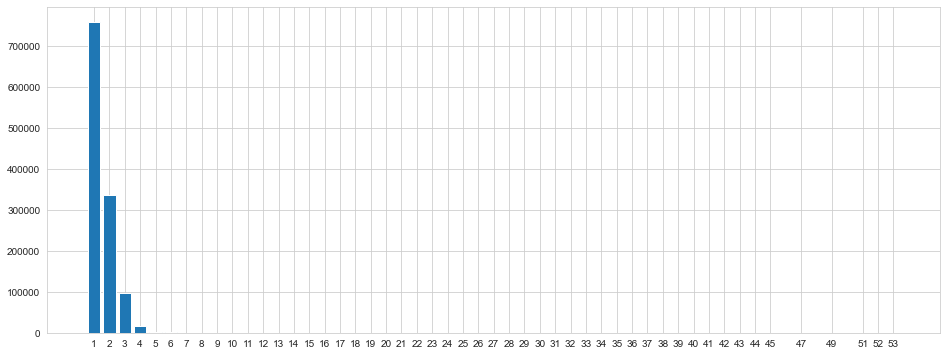

In [720]:
t = (
    tmp_sdf
    .groupBy('client_pin')
    .agg(
        F.countDistinct(F.col('cardnum_ccode')).alias('n_unq_cards')
    )
#     .orderBy(F.col('n_unq_cards').desc())
    .groupBy(F.col('n_unq_cards'))
    .count()
    .orderBy(F.col('n_unq_cards').asc())
    .toPandas()
)
t = t.head(50)
plt.figure(figsize=(16, 6))
plt.bar(t['n_unq_cards'], t['count']);
plt.xticks(t['n_unq_cards']);

In [726]:
f"""{(
    tmp_sdf
    .drop_duplicates([
        'client_pin',
        'cardnum_ccode',
        'cardtrnmcc_ccode',
        'city_name',
        'sttldate_time'
    ])
    .count()
):,}"""

22/08/25 21:59:07 ERROR Executor: Exception in task 1.0 in stage 91.0 (TID 391)]
java.lang.OutOfMemoryError: Java heap space
	at java.io.BufferedOutputStream.<init>(BufferedOutputStream.java:76)
	at org.apache.spark.storage.DiskBlockObjectWriter$ManualCloseBufferedOutputStream$1.<init>(DiskBlockObjectWriter.scala:142)
	at org.apache.spark.storage.DiskBlockObjectWriter.initialize(DiskBlockObjectWriter.scala:144)
	at org.apache.spark.storage.DiskBlockObjectWriter.open(DiskBlockObjectWriter.scala:152)
	at org.apache.spark.storage.DiskBlockObjectWriter.write(DiskBlockObjectWriter.scala:279)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:171)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:

Py4JJavaError: An error occurred while calling o223.count.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 91.0 failed 1 times, most recent failure: Lost task 1.0 in stage 91.0 (TID 391) (192.168.0.105 executor driver): java.lang.OutOfMemoryError: Java heap space
	at java.io.BufferedOutputStream.<init>(BufferedOutputStream.java:76)
	at org.apache.spark.storage.DiskBlockObjectWriter$ManualCloseBufferedOutputStream$1.<init>(DiskBlockObjectWriter.scala:142)
	at org.apache.spark.storage.DiskBlockObjectWriter.initialize(DiskBlockObjectWriter.scala:144)
	at org.apache.spark.storage.DiskBlockObjectWriter.open(DiskBlockObjectWriter.scala:152)
	at org.apache.spark.storage.DiskBlockObjectWriter.write(DiskBlockObjectWriter.scala:279)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:171)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.executor.Executor$TaskRunner$$Lambda$1451/2043573960.apply(Unknown Source)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1462)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2403)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2352)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2351)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2351)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1109)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1109)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1109)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2591)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2533)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2522)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: java.lang.OutOfMemoryError: Java heap space
	at java.io.BufferedOutputStream.<init>(BufferedOutputStream.java:76)
	at org.apache.spark.storage.DiskBlockObjectWriter$ManualCloseBufferedOutputStream$1.<init>(DiskBlockObjectWriter.scala:142)
	at org.apache.spark.storage.DiskBlockObjectWriter.initialize(DiskBlockObjectWriter.scala:144)
	at org.apache.spark.storage.DiskBlockObjectWriter.open(DiskBlockObjectWriter.scala:152)
	at org.apache.spark.storage.DiskBlockObjectWriter.write(DiskBlockObjectWriter.scala:279)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:171)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.executor.Executor$TaskRunner$$Lambda$1451/2043573960.apply(Unknown Source)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1462)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)


In [710]:
(
    tmp_sdf
    .filter(F.col('client_pin') == pin)
    .orderBy(F.col('client_pin'), F.col('cardnum_ccode'), F.col('sttldate_time').desc())
    .limit(50)
    .toPandas()
)

,client_pin,cardnum_ccode,cardtrnmcc_ccode,mrc_name,cashflowcategory_ccode,cashflowcategory_name,cashflowbrand_ccode,cashflowbrand_name,country_ccode,city_name,opdate_time,sttldate_time,operation_cur_amt,currency_operation,cardtrnopkind_ccode,cardtrnoptypegroup_ccode,cardtrnterminaltype_ccode,cardinttype_ccode,cardpaymentsystem_ccode,cardcategorykind_ccode,cardcobrendkind_ccode
0,A99132,4790872059926814,6011,ALFA ISS,ATMCASHOUT,ВЫДАЧА НАЛИЧНЫХ В БАНКОМАТЕ,ALFABANK,ALFA BANK,RUS,САНКТ-ПЕТЕРБУРГ,2021-08-01 18:34:16,2021-08-02 01:45:36,39000.00,RUR,ACASH,DR,ATM,DT,VISA,PLATINUM,NO_COBREND
1,A99132,4790872059926814,6011,ALFA ISS,ATMCASHOUT,ВЫДАЧА НАЛИЧНЫХ В БАНКОМАТЕ,ALFABANK,ALFA BANK,RUS,САНКТ-ПЕТЕРБУРГ,2021-08-01 18:34:16,2021-08-02 01:45:36,39000.00,RUR,ACASH,DR,ATM,DT,VISA,PLATINUM,NO_COBREND
2,A99132,5559492812121138,5921,ADMIRALA MAKAROVA 14,ALCOHOL,АЛКОГОЛЬ,N/D,Не определено,RUS,MOSCOW,2021-08-13 11:36:24,2021-08-17 05:02:11,3464.94,RUR,PURCH,DR,UNKNOWN,ER,MC,WORLD,CASHBACK
3,A99132,5559492812121138,9399,AVTODOR-TR.RU,GOODS&SERVICE,ТОВАРЫ И УСЛУГИ,N/D,Не определено,RUS,MOSKVA,2021-08-14 15:59:00,2021-08-17 05:02:06,1000.00,RUR,PURCH,DR,EPOS,ER,MC,WORLD,CASHBACK
4,A99132,5559492812121138,5541,LUKOIL.AZS 77550 77C,GASSTATION,АВТОЗАПРАВКИ,LUKOIL,LUKOIL,RUS,MOSCOW,2021-08-13 11:21:30,2021-08-15 05:03:39,2250.74,RUR,PURCH,DR,UNKNOWN,ER,MC,WORLD,CASHBACK
5,A99132,5559492812121138,9399,GKU AMPP,GOODS&SERVICE,ТОВАРЫ И УСЛУГИ,N/D,Не определено,RUS,MOSKVA,2021-08-13 14:59:25,2021-08-15 05:03:34,100.00,RUR,PURCH,DR,UNKNOWN,ER,MC,WORLD,CASHBACK
6,A99132,5559492812121138,5921,SMOLNAYA 49,ALCOHOL,АЛКОГОЛЬ,N/D,Не определено,RUS,MOSCOW,2021-08-08 13:50:54,2021-08-11 05:18:50,3464.94,RUR,PURCH,DR,POS,ER,MC,WORLD,CASHBACK
7,A99132,5559492812121138,5541,LUKOIL.AZK 53266 53S,GASSTATION,АВТОЗАПРАВКИ,LUKOIL,LUKOIL,RUS,OKULOVKA,2021-08-05 15:12:19,2021-08-07 05:12:49,2815.23,RUR,PURCH,DR,POS,ER,MC,WORLD,CASHBACK
8,A99132,5559492812121138,5541,LUKOIL.AZK 53266 53S,GASSTATION,АВТОЗАПРАВКИ,LUKOIL,LUKOIL,RUS,OKULOVKA,2021-08-05 15:12:19,2021-08-07 05:12:49,2815.23,RUR,PURCH,DR,POS,ER,MC,WORLD,CASHBACK
9,A99132,5559492812121138,5541,LUKOIL.AZK 53267 53S,GASSTATION,АВТОЗАПРАВКИ,LUKOIL,LUKOIL,RUS,OKULOVKA,2021-08-05 08:48:09,2021-08-07 05:12:48,2144.79,RUR,PURCH,DR,POS,ER,MC,WORLD,CASHBACK
